### Riempimento della DPRAM

In [1]:
import ROOT as R
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Welcome to JupyROOT 6.16/00


In [2]:
def load_file(path):
    return R.TFile.Open(path)

In [3]:
c = R.TCanvas("c")

In [99]:
f=load_file("/home/alb/srv_lab/376/Sub_RUN_ana_135.root")
tcoarse_dict={}
l1_trigger_dict={}

In [100]:
for  entryNum  in  range(0,f.tree.GetEntries ()):
    f.tree.GetEntry(entryNum)
    tcoarse=int(getattr(f.tree,"tcoarse"))
    l1ts_min_tcoarse=int(getattr(f.tree,"l1ts_min_tcoarse"))

    page= (f'{tcoarse:016b}'[4:8])
    count=getattr(f.tree,"count")
    gemroc=getattr(f.tree,"gemroc")
    tiger=getattr(f.tree,"tiger")
    if tiger<4:
        FEB_group=0
    else:
        FEB_group=1

    if count not in tcoarse_dict.keys():
        tcoarse_dict[count]={}
    if gemroc not in tcoarse_dict[count].keys():
        tcoarse_dict[count][gemroc]={}
    if FEB_group not in tcoarse_dict[count][gemroc].keys():
        tcoarse_dict[count][gemroc][FEB_group]={}
    if  page not in tcoarse_dict[count][gemroc][FEB_group].keys():
        tcoarse_dict[count][gemroc][FEB_group][page]=0
    tcoarse_dict[count][gemroc][FEB_group][page]+=1
    
    if count not in l1_trigger_dict.keys():
        l1_trigger_dict[count]=[]
    l1_trigger_dict[count].append(l1ts_min_tcoarse+tcoarse)


In [101]:
l1_trigger_dict[106]

[5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921,
 5921]

In [102]:
l1_trigger_extremes={}
for count in l1_trigger_dict:
#     print (f'Count: {count}, Std:{np.std(l1_trigger_dict[count])}\n {l1_trigger_dict[count]}')
    l1_trigger_dict[count]= (stats.mode(l1_trigger_dict[count])).mode[0]
    l1_trigger_extremes[count]=(l1_trigger_dict[count]-1567,l1_trigger_dict[count]-1300)

In [103]:
print([(f'{l1_trigger_extremes[106][0]:016b}'[4:8])])
print([(f'{l1_trigger_extremes[106][1]:016b}'[4:8])])
print(l1_trigger_dict[106])

['0001']
['0010']
5921


In [104]:
p_lenght= 256
lenght_dict={}
for count in l1_trigger_dict:
        lenght_dict[count]={}
#         print (count)
        len3=0
        beginning=(int(f'{l1_trigger_extremes[count][0]:016b}'[4:16],2))
        end=(int(f'{l1_trigger_extremes[count][1]:016b}'[4:16],2))
        first_page=(int(f'{l1_trigger_extremes[count][0]:016b}'[4:8],2))*256
        last_page=(int(f'{l1_trigger_extremes[count][1]:016b}'[4:8],2))*256
        if int(f'{l1_trigger_extremes[count][1]:016b}'[4:8],2)-int(f'{l1_trigger_extremes[count][0]:016b}'[4:8],2)>1:
            len1=256-(beginning-first_page)
            len2=256
            len3=end-last_page
        elif  (last_page-beginning>0):
            len1=last_page-beginning
            len2=end-last_page
        elif  (last_page-beginning<0):
            len1=last_page+4096-beginning
            len2=end-last_page
#         print (len1,len2,len3,len1+len2+len3)
        if len3==0:
            lenght_dict[count][(f'{l1_trigger_extremes[count][0]:016b}'[4:8])]=len1/256
            lenght_dict[count][(f'{l1_trigger_extremes[count][1]:016b}'[4:8])]=len2/256
        else:
            lenght_dict[count][(f'{l1_trigger_extremes[count][0]:016b}'[4:8])]=len1/256
            lenght_dict[count][(f'{l1_trigger_extremes[count][0]+256:016b}'[4:8])]=len2/256
            lenght_dict[count][(f'{l1_trigger_extremes[count][1]:016b}'[4:8])]=len3/256

In [105]:
lenght_dict[106]

{'0001': 0.9921875, '0010': 0.05078125}

In [106]:
risky=0
sure_sat=0
for count in tcoarse_dict.keys():
    for gemroc in tcoarse_dict[count].keys():
        for FEB_group in tcoarse_dict[count][gemroc].keys():
            for page in tcoarse_dict[count][gemroc][FEB_group].keys():
                try:
                    if (tcoarse_dict[count][gemroc][FEB_group][page]>lenght_dict[count][page]*32) and gemroc not in (12,13):
                        risky+=1
                        print ("{} hits from Count= {},GEMROC ={}, FEB_couple={},Tcoarse[8:11]={}".format(tcoarse_dict[count][gemroc][FEB_group][page],count,gemroc,FEB_group,page))
                        if lenght_dict[count][page]==256:
                            sure_sat+=1
                except:
                    print ("Count: {} wrong trigger time ({})".format(count,page))
tot = max(tcoarse_dict.keys())
print ("{}/{} count at risk, sure sat={}".format(risky,tot*10,sure_sat))

Count: 2 wrong trigger time (0001)
19 hits from Count= 3,GEMROC =0, FEB_couple=1,Tcoarse[8:11]=0001
28 hits from Count= 3,GEMROC =10, FEB_couple=0,Tcoarse[8:11]=0001
43 hits from Count= 3,GEMROC =2, FEB_couple=1,Tcoarse[8:11]=0001
37 hits from Count= 3,GEMROC =3, FEB_couple=0,Tcoarse[8:11]=0001
25 hits from Count= 3,GEMROC =3, FEB_couple=1,Tcoarse[8:11]=0001
26 hits from Count= 3,GEMROC =4, FEB_couple=1,Tcoarse[8:11]=0001
18 hits from Count= 3,GEMROC =5, FEB_couple=1,Tcoarse[8:11]=0001
29 hits from Count= 3,GEMROC =7, FEB_couple=1,Tcoarse[8:11]=0001
22 hits from Count= 3,GEMROC =7, FEB_couple=0,Tcoarse[8:11]=0001
55 hits from Count= 3,GEMROC =8, FEB_couple=0,Tcoarse[8:11]=0001
Count: 4 wrong trigger time (1100)
5 hits from Count= 5,GEMROC =3, FEB_couple=1,Tcoarse[8:11]=1101
30 hits from Count= 5,GEMROC =8, FEB_couple=1,Tcoarse[8:11]=1100
34 hits from Count= 7,GEMROC =2, FEB_couple=0,Tcoarse[8:11]=1101
27 hits from Count= 7,GEMROC =3, FEB_couple=0,Tcoarse[8:11]=1101
Count: 11 wrong trig

In [112]:
f.tree.Draw("tiger:tcoarse","count==4","colz")

56

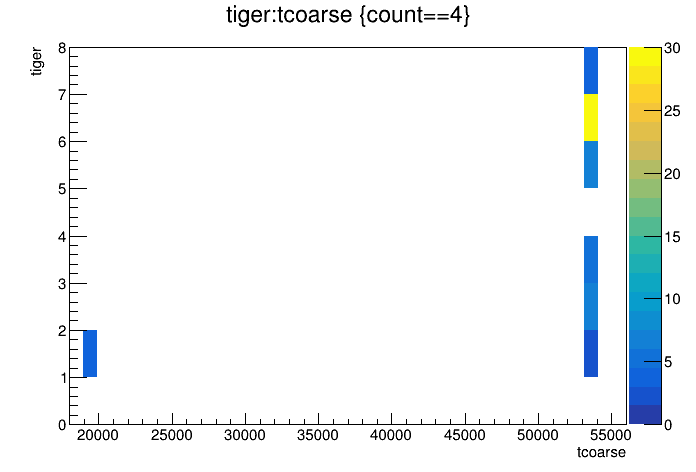

In [113]:
c.Draw()

In [109]:
f.tree.Show(5532)

======> EVENT:5532
 runNo           = 376
 subRunNo        = 135
 layer           = 2
 channel         = 59
 gemroc          = 4
 tiger           = 5
 max_count       = 111
 strip_x         = 882
 strip_v         = -1
 radius          = 129.8
 charge_SH_uncal = 1008
 charge_SH       = 54.7353
 charge_TOT_uncal = 167.32
 charge_TOT      = 15.2821
 constant        = 479.724
 slope           = -9.05675
 qmax            = 52.9687
 delta_coarse    = 26
 pos_phi         = 4.39324
 count           = 3
 timestamp       = 55187
 l1ts_min_tcoarse = 1411
 tcoarse_min_ts  = -1411
 tcoarse         = 4370
 ecoarse         = 300
 tfine_uncal     = 296
 efine_uncal     = 1008
 ttrigg          = 1503
 trigg_tcoarse   = 4789
 lasttigerframenum = 0
 chip            = 2
 FEB_label       = 18
 tfine           = 4.8205
 efine           = 0
 tac             = 3
 trigg_flag      = 0
 time            = 1.13023e+10
 saturated       = 1


In [111]:
for  entryNum  in  range(0,f.tree.GetEntries ()):
    f.tree.GetEntry(entryNum)
    delta_coarse=int(getattr(f.tree,"delta_coarse"))
    count=int(getattr(f.tree,"count"))

    ecoarse=getattr(f.tree,"ecoarse")
    tcoarse=getattr(f.tree,"tcoarse")
    if tcoarse <40000 and count == 4:
        print (entryNum)

9342
9343
9344
9345
